# Lab 08: Decision Trees
## Sam Bacon - March 8, 2021
### Decision Trees and Random Forests for Classification

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# Read in dataset and display rows
csv = 'https://drive.google.com/uc?export=download&id=1XHF2E7uXPqXSmGi2X1E9_o9VmIh89bfV'
titanic = pd.read_csv('titanic.csv')
titanic.head(5)

FileNotFoundError: ignored

In [ ]:
# Pulling 'survived' variable into y dataset
y = titanic["Survived"]

x
y

NameError: ignored

In [ ]:
# Splitting data into training and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
# Import the library
from sklearn.tree import DecisionTreeClassifier

# Make a tree object using entropy to decide splits
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fit a model to the training data
# (or, learn the decision tree)
clf = clf.fit(Xtrain, ytrain)

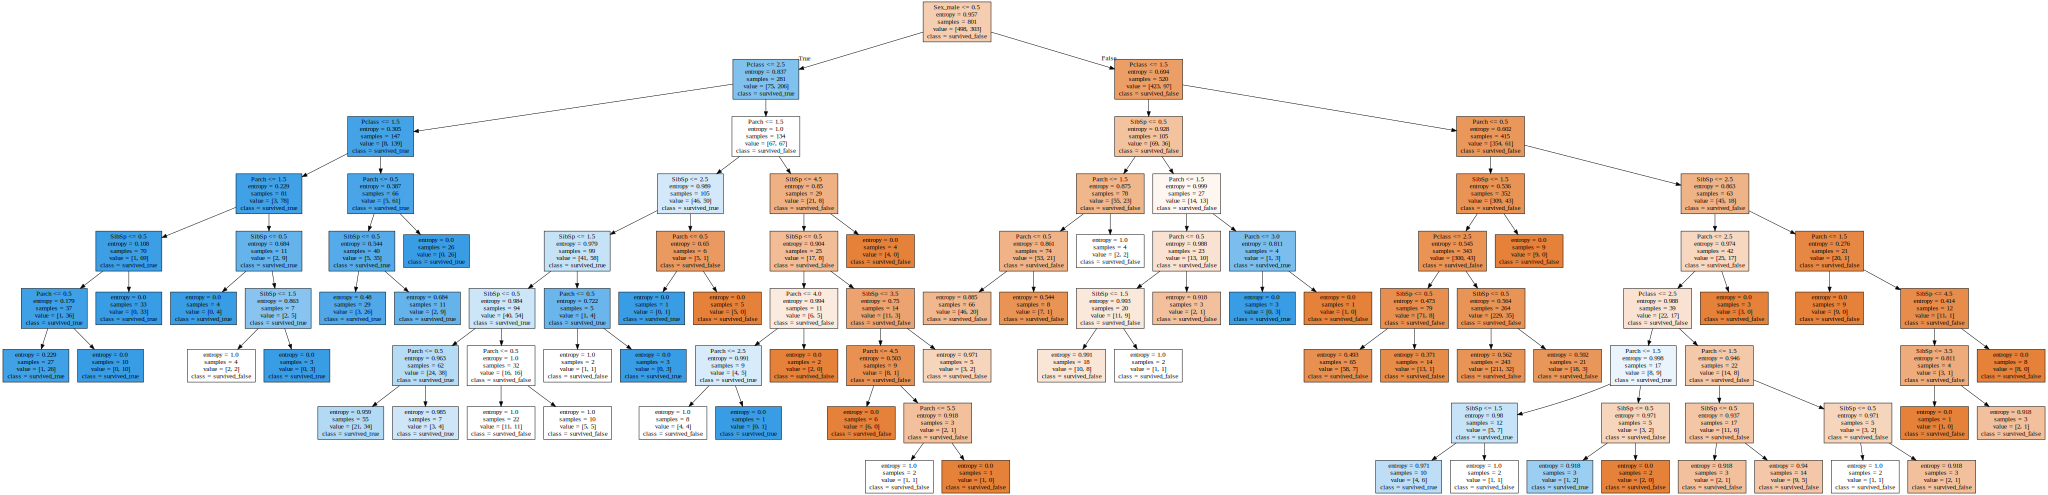

In [ ]:
# Visualizing the decision tree
from sklearn.tree import export_graphviz
import graphviz

vis_data = export_graphviz(clf, out_file=None,
                feature_names=Xtrain.columns,
                class_names=['survived_false','survived_true'],
                filled=True)

output = graphviz.Source(vis_data) 
output

In [ ]:
# Comments on the decision tree...

Based on the decision tree, Gender appears to be most important in predicting whether a passenger on the Titanic survived. The decision tree was trained using 801 total data values, with 303 of those people surviving the crash of the Titanic (37.8%). However, when the data has been divided by gender (first step of the decision tree), we see that 206/281 females survived (73.3%) while only 97/520 (18.7%) of males survived. The second most important factor appears to be class, with first-class passengers tending to have a higher survival rate. That being said, Gender is clearly the most important factor in predicting survival probability.

There is a leaf node with an entropy of 0 with 33 survivors. These passengers were first-class females with one or fewer parents or children onboard and at least one sibling or spouse onboard. 

In [ ]:
# Using the model to determine accuracy

ypred_train = clf.predict(Xtrain)
ypred_test = clf.predict(Xtest)


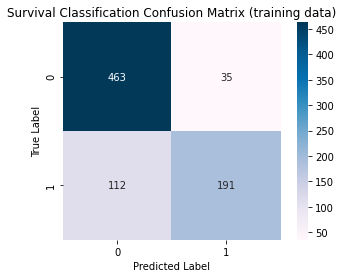

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       498
           1       0.85      0.63      0.72       303

    accuracy                           0.82       801
   macro avg       0.83      0.78      0.79       801
weighted avg       0.82      0.82      0.81       801



In [ ]:
# Analyzing the accuracy of the data...

# Confusion matrix for training data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



cm_train = confusion_matrix(ytrain, ypred_train)

sns.heatmap(cm_train, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu",
                    xticklabels=clf.classes_,
                    yticklabels=clf.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Survival Classification Confusion Matrix (training data)')
plt.show()

print(classification_report(ytrain, ypred_train))

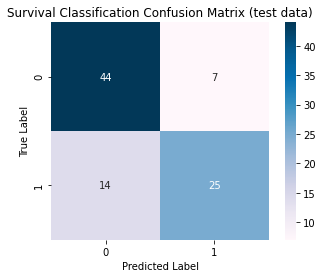

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        51
           1       0.78      0.64      0.70        39

    accuracy                           0.77        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.77      0.77      0.76        90



In [ ]:
# Confusion matrix for test data

cm_test = confusion_matrix(ytest, ypred_test)

sns.heatmap(cm_test, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu",
                    xticklabels=clf.classes_,
                    yticklabels=clf.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Survival Classification Confusion Matrix (test data)')
plt.show()

print(classification_report(ytest, ypred_test))

Based on the confusion matrices above, the model predicts the training data with 82% accuracy, but it only predicts the test data with 77% accuracy. This indicates that the model we created might be slightly overfitting patterns in the training data.

In [ ]:
# Using a random forest model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=0, criterion='entropy')
model = model.fit(Xtrain, ytrain)

forest_train = model.predict(Xtrain)
forest_test = model.predict(Xtest)

print(classification_report(ytrain, forest_train))
print(classification_report(ytest, forest_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       498
           1       0.77      0.72      0.75       303

    accuracy                           0.82       801
   macro avg       0.81      0.80      0.80       801
weighted avg       0.81      0.82      0.81       801

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        51
           1       0.84      0.69      0.76        39

    accuracy                           0.81        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.81      0.81        90



With the random forest technique, the model predicts the training and test data with nearly identical accuracy. This approach appears to solve the overfitting issues from the previous model.

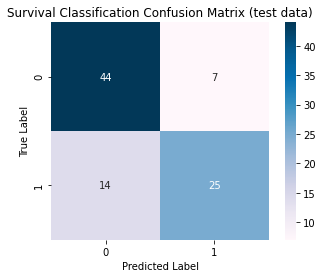

In [ ]:
# Confusion matrix for random forest model

cm_forest = confusion_matrix(ytest, forest_test)

sns.heatmap(cm_test, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Survival Classification Confusion Matrix (test data)')
plt.show()